In [6]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:

WT = pd.read_csv("/Users/shantanu/Documents/GitHub/2025_NBIO_207A/STUDENT_CODE_DATA/Ashutosh/WT.csv")
FX = pd.read_csv("/Users/shantanu/Documents/GitHub/2025_NBIO_207A/STUDENT_CODE_DATA/Ashutosh/FX.csv")

# Define and fit the GLM
model_formula = 'choice ~ p_Sub + p_Par + p_Both'
glm_model = smf.glm(formula=model_formula,
                    data=WT,
                    family=sm.families.Binomial()).fit()

# Print model summary
print(glm_model.summary())



                 Generalized Linear Model Regression Results                  
Dep. Variable:                 choice   No. Observations:                 9075
Model:                            GLM   Df Residuals:                     9071
Model Family:                Binomial   Df Model:                            3
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5480.8
Date:                Tue, 04 Mar 2025   Deviance:                       10962.
Time:                        11:31:32   Pearson chi2:                 9.08e+03
No. Iterations:                     5   Pseudo R-squ. (CS):            0.01512
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9502      0.043     22.168      0.0

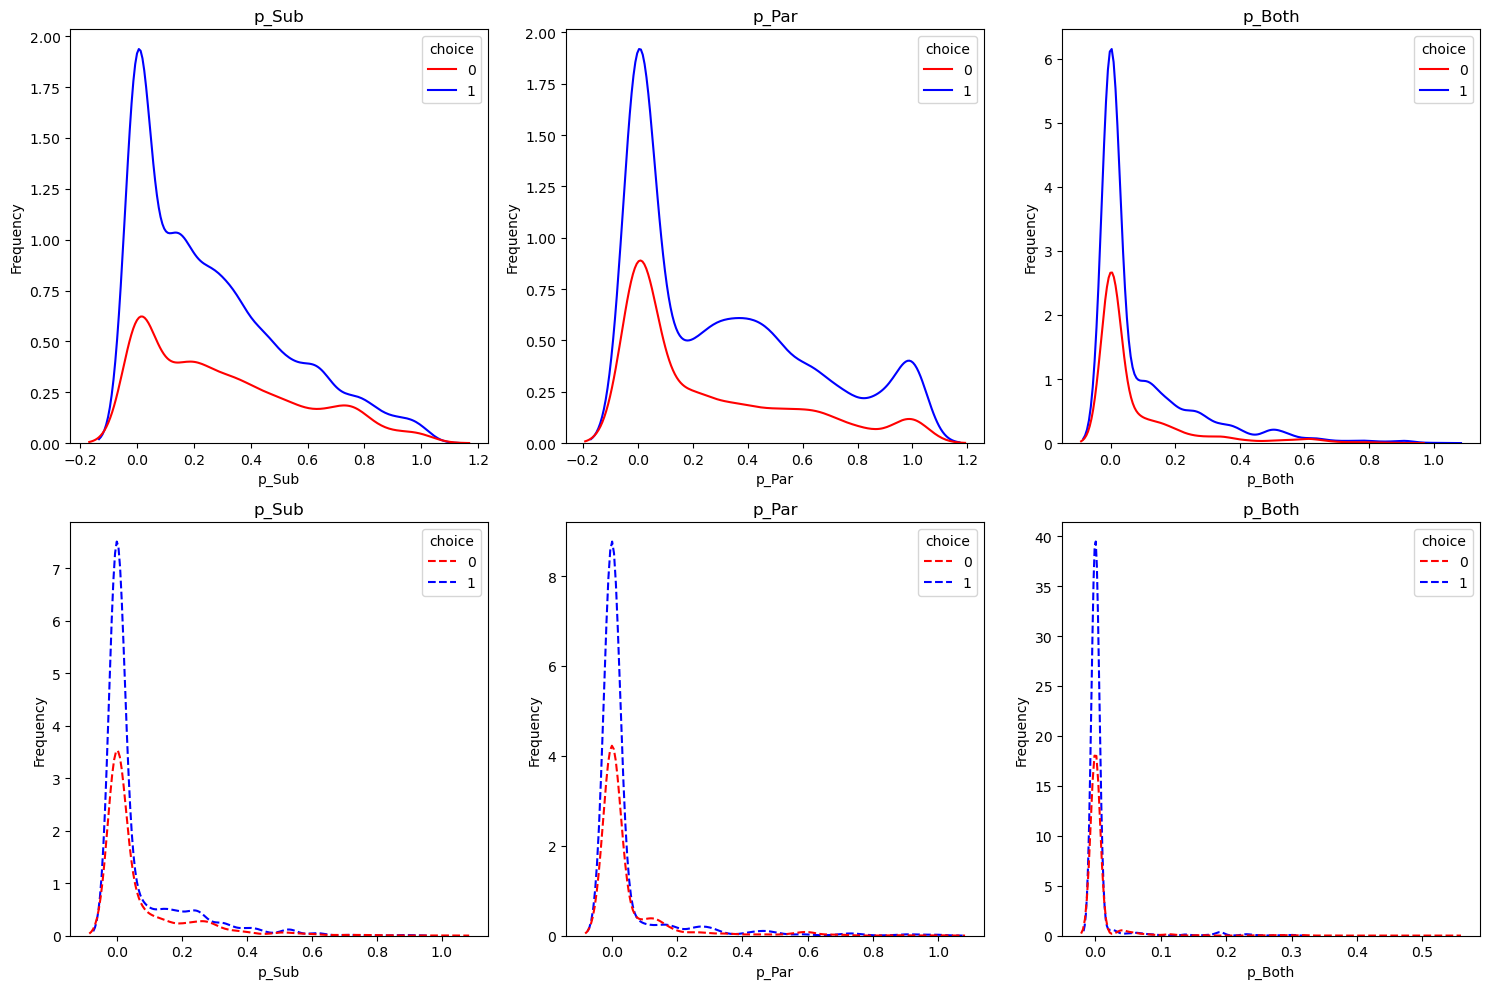

In [3]:

# # Define predictors
# predictors = ['p_Sub', 'p_Par', 'p_Both']

# # Set up subplots
# fig, axes = plt.subplots(1, 3) # , figsize=(15, 5)

# # Loop through each predictor and plot the distributions
# for i, predictor in enumerate(predictors):
#     # sns.histplot(data = WT, x = predictor, hue = "choice", kde=True, bins = 30, ax=axes[i], palette={0: "red", 1: "blue"}, alpha=0.4)
#     sns.kdeplot(data = WT, x = predictor, hue = "choice",  ax=axes[i], palette={0: "red", 1: "blue"}, alpha=0.4)
#     axes[i].set_title(f'{predictor}')
#     axes[i].set_xlabel(predictor)
#     axes[i].set_ylabel('Frequency')

# plt.tight_layout()
# plt.show()


import seaborn as sns
import matplotlib.pyplot as plt

# Define predictors
predictors = ['p_Sub', 'p_Par', 'p_Both']

# Set up subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # 

# Initialize a variable to track the global y-axis limits
# y_limits = None

# Loop through each predictor and plot the distributions
for i, predictor in enumerate(predictors):
    # Plot for WT (solid lines)
    sns.kdeplot(data=WT, x=predictor, hue="choice", ax=axes[0, i], palette={0: "red", 1: "blue"})
    
    # Plot for DF2 (dashed lines)
    sns.kdeplot(data = FX, x=predictor, hue="choice", ax=axes[1, i], palette={0: "red", 1: "blue"}, 
                linestyle='--')

    # axes[i].set_title(f'{predictor}')
    # axes[i].set_xlabel(predictor)
    # axes[i].set_ylabel('Frequency')
    
    axes[0, i].set_title(f'{predictor}')
    axes[0, i].set_xlabel(predictor)
    axes[0, i].set_ylabel('Frequency')

    axes[1, i].set_title(f'{predictor}')
    axes[1, i].set_xlabel(predictor)
    axes[1, i].set_ylabel('Frequency')

    # Update the global y-axis limits after the first plot
    # if y_limits is None:
    #     y_limits = axes[i].get_ylim()
    # else:
    #     y_limits = (min(y_limits[0], axes[i].get_ylim()[0]), max(y_limits[1], axes[i].get_ylim()[1]))

# Set the same y-limits for all axes
# for ax in axes:
#     ax.set_ylim(y_limits)

plt.tight_layout()
plt.show()




KeyboardInterrupt: 

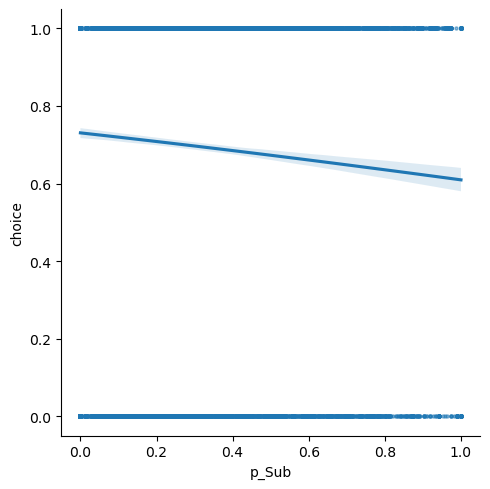

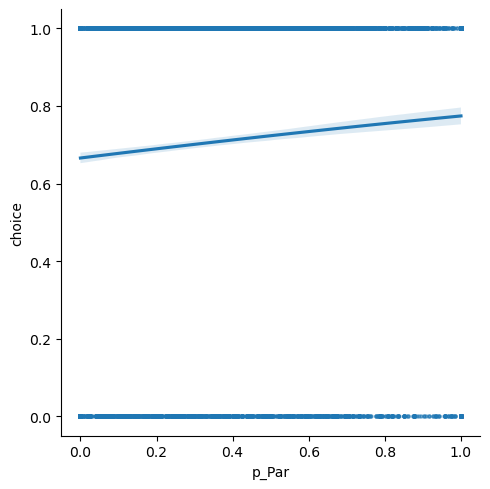

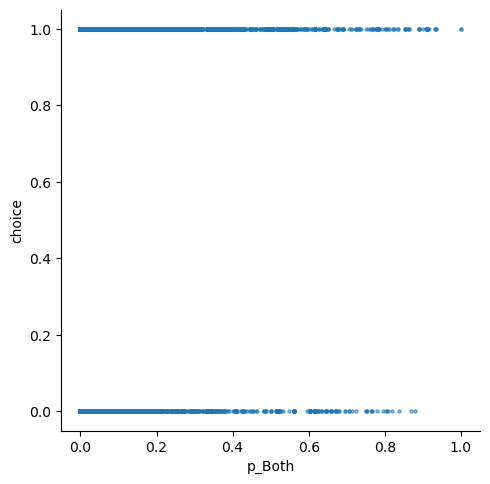

In [4]:

sns.lmplot(x = "p_Sub", y = "choice", data = WT, logistic = True, scatter_kws={"s": 5, "alpha": 0.5})
sns.lmplot(x = "p_Par", y = "choice", data = WT, logistic = True, scatter_kws={"s": 5, "alpha": 0.5})
sns.lmplot(x = "p_Both", y = "choice", data = WT, logistic = True, scatter_kws={"s": 5, "alpha": 0.5})


/var/folders/41/z_4177k17156qs388rl31_2r0000gn/T/ipykernel_33328/3578180925.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Predictor', y='Coefficient', data=coef_df, palette='coolwarm', edgecolor='black')


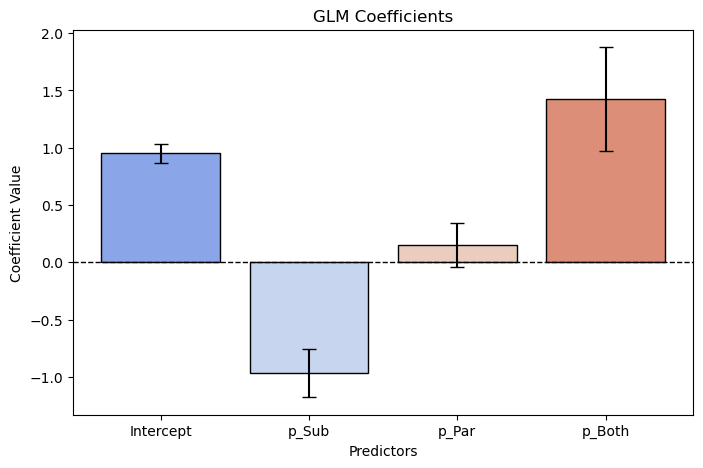

In [8]:

# Extract coefficients and confidence intervals from the model
coef_df = pd.DataFrame({
    'Predictor': glm_model.params.index,  # Predictor names
    'Coefficient': glm_model.params.values,  # Coefficient values
    'Lower CI': glm_model.conf_int()[0],  # Lower bound of confidence interval
    'Upper CI': glm_model.conf_int()[1]   # Upper bound of confidence interval
})

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x='Predictor', y='Coefficient', data=coef_df, palette='coolwarm', edgecolor='black')
plt.errorbar(x=coef_df['Predictor'], y=coef_df['Coefficient'], 
             yerr=[coef_df['Coefficient'] - coef_df['Lower CI'], coef_df['Upper CI'] - coef_df['Coefficient']], 
             fmt='none', ecolor='black', capsize=5)

plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.xlabel('Predictors')
plt.ylabel('Coefficient Value')
plt.title('GLM Coefficients')
plt.show()


Permutation Test: Statistic = -0.0063, p-value = 0.0666


NameError: name 'pt' is not defined

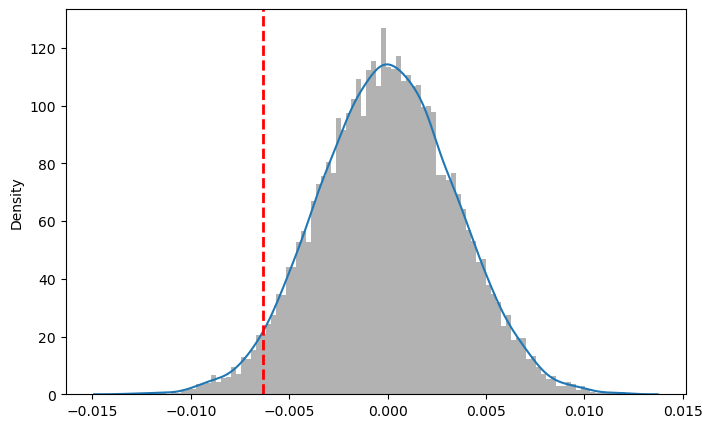

<Figure size 700x500 with 0 Axes>

In [10]:

import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
#import ptitprince as pt  # For raincloud plots
import numpy as np
import pandas as pd

WT_match = WT[WT["choice"] == 1]
WT_nonmatch = WT[WT["choice"] == 0]

FX_match = FX[FX["choice"] == 1]
FX_nonmatch = FX[FX["choice"] == 0]


col = "p_Par"

# Clean the datasets (drop NaNs)
WT_match_clean = FX_match[col].dropna()
FX_match_clean = FX_nonmatch[col].dropna()

# Ensure the datasets are not empty
if WT_match_clean.empty or FX_match_clean.empty:
    print("One of the groups has no valid data! T-test cannot be performed.")
else:
    # # Perform Welch’s t-test (equal_var=False handles unequal variances)
    # t_stat, p_value = stats.ttest_ind(WT_match_clean, FX_match_clean, equal_var=False)

    # # Print results
    # print(f"T-statistic = {t_stat:.4f}, p-value = {p_value:.4e}")  # Use scientific notation for small p-values
    # Perform permutation test with 10,000 resamples
    # Perform the permutation test
    result = stats.permutation_test((WT_match_clean, FX_match_clean), 
                                statistic=lambda x, y: np.mean(x) - np.mean(y), 
                                permutation_type='independent', 
                                alternative='two-sided', 
                                n_resamples=10000)

    # Extract test statistic and p-value correctly
    print(f"Permutation Test: Statistic = {result.statistic:.4f}, p-value = {result.pvalue:.4f}")

    # plot
    # Extract the null distribution (permuted differences)
    null_distribution = result.null_distribution
    
    # Extract the observed test statistic
    observed_statistic = result.statistic
    
    # Plot the null distribution
    plt.figure(figsize=(8, 5))
    plt.hist(null_distribution, bins=100, density=True, histtype = 'stepfilled', alpha=0.6, color='gray', label="Null Distribution")
    sns.kdeplot(null_distribution)
    # Mark the observed test statistic
    plt.axvline(observed_statistic, color='red', linestyle='dashed', linewidth=2, label="Observed Statistic")

# Create a combined DataFrame
df_raincloud = pd.DataFrame({
    col: np.concatenate([WT_match_clean, FX_match_clean]), 
    "Group": ["WT"] * len(WT_match_clean) + ["FX"] * len(FX_match_clean)
})

# Calculate median values
wt_median = WT_match_clean.median()
fx_median = FX_match_clean.median()

# Create Raincloud Plot
plt.figure(figsize=(7, 5))
ax = pt.RainCloud(x="Group", y=col, data=df_raincloud, 
                  palette="Set2", width_viol=1.0, width_box=.2, bw = .2, 
                  point_size=3, alpha=0.6, orient = "h", move= .0, pointplot = True)

# Draw median lines
# plt.axvline(wt_median, color="blue", linestyle="--", linewidth=2, label="WT Median")
# plt.axvline(fx_median, color="red", linestyle="--", linewidth=2, label="FX Median")

# Labels & Title
plt.xlabel("Group")
plt.ylabel(col)
# plt.title("Raincloud Plot of p_Both for WT and FX Groups with Medians")

# Add Legend
plt.legend()

# Show Plot
plt.show()

# Create a combined DataFrame
df_raincloud = pd.DataFrame({
    "score": np.concatenate([WT_match_clean, FX_match_clean]), 
    "group": ["WT"] * len(WT_match_clean) + ["FX"] * len(FX_match_clean)
})


NameError: name 'pt' is not defined

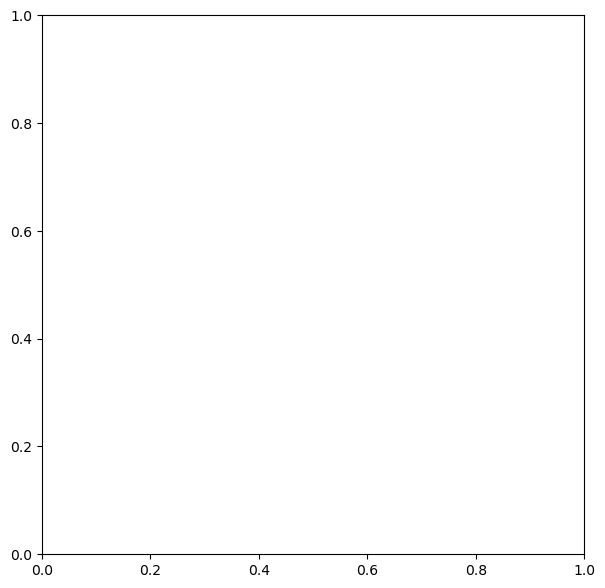

In [11]:

# Add "Group" column before reshaping
WT["group"] = "WT"
FX["group"] = "FX"

# Combine WT and FX
df_combined = pd.concat([WT, FX], ignore_index=True)

# Melt the dataframe to reshape it into long format
df_raincloud = df_combined.melt(id_vars=["group"], value_vars=["p_Both", "p_Sub", "p_Par"], 
                            var_name="predictor", value_name="score")
dx = "group"; dy = "score"; dhue = "predictor"; ort = "h"; pal = "Set2"; sigma = .2
f, ax = plt.subplots(figsize=(7, 7))

ax=pt.RainCloud(x = dx, y = dy, hue = dhue, data = df_raincloud, palette = pal, bw = sigma, width_viol = .7,
                ax = ax, orient = ort , alpha = .3, dodge = True, pointplot = True, move = .0)
